<H1>Agrupamiento, agrupamiento espacial y geodemografía geodemographics</H1>
<p>Esta práctica está basada en el curso Geographic Data Science del Dr. Dani Arribas-Bel de la Universidad de Liverpool </p>
<a href="http://darribas.org/gds18/"> Geographic Data Science</a>
<p>Los datos para esta práctica fueron obtenidos de la página <a href= http://insideairbnb.com/index.html>Inside Airbnb. Adding data to the debate. </a> </p>

<p> Muchos tipos de análisis de datos espaciales son complejos e involucran varias dimensiones que son difíciles de resumir en una sola variable. El Clustering (agrupamiento) aborda estas preguntas reduciendo la dimensionalidad (el número de variables relevantes) convirtiéndolas en un conjunto de clases que se puede manejar de manera más intuitiva. Por esta razón, el método es utilizado en varios contextos como la política pública y la mercadotecnia. Debido a que estos métodos no requieren de suposiciones sobre la estructura de los datos, suelen ser utilizados como una herramienta exploratoria que puede dar pistas sobre la forma y el contenido de un conjunto de datos.</p>
<p>La idea básica del agrupamiento estadístico es la de resumir la información contenida en muchas variables y crear un conjunto reducido de categorías. Cada observación es asignada a una sola categoría. Cuando el clustering es realizado en observaciones que representan áreas, esta técnica sule ser llamada análisis geodemográfico.</p>
<p>Aunque exisen muchas técnicas para agrupar las observaciones de un conjunto de datos estadísticamente, todas ellas se basan en la premisa de utilizar un conjunto de atributos para definir clases o categorías de observaciones que son similares entre sí, pero difieren entre los grupos. La manera en que se definen estas similitudes o discimilitudes depende de las técnicas particulares. En la práctica utilizaremos el método K-Means, que es probablemente el más utilizado con estos fines.</p>
<p>En el caso del análisis de datos espaciales, existe un subconjunto de métodos que son de particular interés en muchos casos comunes en las Ciencias de Datos Espaciales; estos métodos reciben el nombre de técnicas de regionalización. Las técnicas de regionalización involucran el agrupamiento estadístico de las observaciones con la limitante de que las observaciones requieren ser vecinos geográficaos para estar en la misma categoría. Debido a esto, más que categoría, utilizamos el término área para cada observación y región para cada categoría, de manera que la regionalización es la construcción de regiones constituidas por áreas pequeñas.</p>


In [70]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import pysal as ps
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster

<h2>Datos</h2>
<p>Los datos que utilizaremos son un estracto del sitio de AirBnb, que es una compañía que proveé un punto de encuentro para buscar una alternativa a un hotel cuando alguien visita una ciudad y los habitantes locales desean rentar una casa, habitación o departamento para ganar diner extra. El sitio web ha actualizado de manera continua la lista de todas las propiedades disponibles en una ciudad determinada que los clientes pueden revisar y reservar. Adicionalmente, el sitio cuenta con mecanismos de restroalimentación para clientes y los prestadores del servicio de alojamiento. AirBnB también da información adicional para cada propiedad como la calificación de limpieza y la comunicación entre los huéspedes y anfitriones.</p>
 

In [71]:
#Carga los datos
abb = gpd.read_file('ilm_abb.geojson')

In [102]:
# Fija el CRS manualmente. 
abb.crs = {'init': u'epsg:27700'}
abb.info()

<p>Antes de explorar los datos definimos las variables de interés para el agrupamiento. En especial, el interés es en las variables de calificación de las revisiones.</p>

In [73]:
ratings = ['review_scores_rating', 'review_scores_accuracy', 
           'review_scores_cleanliness', 'review_scores_checkin', 
           'review_scores_communication', 'review_scores_location',
           'review_scores_value']

<h2>Conociendo los datos</h2>
<p>La mejor forma de explorar la geografía de las calificaciones de AirBnb es graficando cada variable en un mapa distinto. Esto nos dará una perspectiva de cada una de las vaiables de interés.
Genramos un loop que genera cada mapa y lo pone en una subgráfica de la figura principal.</p>


In [79]:
# Crea figura y ejes (en este caso es un arreglo de 3 x 3)
f, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
# Hace los ejes accesibles con una sola indexación
axs = axs.flatten()
# Comienza el loop sobre las variables de interés
for i, col in enumerate(ratings):
    # Selecciona el eje en el que el irá el mapa.
    ax = axs[i]
    # Grafica el mapa
    abb.plot(column=col, ax=ax, scheme='Quantiles', \
             linewidth=0, cmap='Blues', alpha=0.75)
    # Remueve "basura" del eje
    ax.set_axis_off()
    # Le pone el nombre de la variable a cada eje
    ax.set_title(col)
# Despliega la figura
plt.show()

IndentationError: unexpected indent (<ipython-input-79-ef78e2010b8b>, line 11)

<p>Antes de profundizar en la interpretación sustantiva del mapa, avancemos por el proceso de creación de la figura anterior, que involucra varias subgráficas dentro de la misma figura:

Primero (L. 2) establecemos el número de filas y columnas que queremos para la cuadrícula de subplots.
Luego desempaquetamos la cuadrícula en una lista plana (matriz) para los ejes de cada subtrama que podemos recorrer (L. 4).
En este punto, configuramos un bucle for (L. 6) para trazar un mapa en cada una de las subgráficas.
Dentro del ciclo (L. 6-14), extraemos el eje (L. 8), trazamos la coropleta (L. 10) y diseñamos el mapa (L. 11-14).
Visualizar la figura (L. 16).
Como podemos ver, hay una variación sustancial en la forma en que las calificaciones de los diferentes aspectos se distribuyen en el espacio. Mientras que las variables como el valor general (review_scores_value) o la comunicación (review_scores_communication) tienden a ser más altas en áreas periféricas, otras como la puntuación de ubicación (review_scores_location) están muy concentradas en el centro de la ciudad.

Aunque solo tenemos siete variables, es muy difícil "superponerlas" para obtener una evaluación general de la naturaleza de cada parte de Londres. Para las correlaciones bivariadas, una herramienta útil es la gráfica de la matriz de correlación, disponible en seaborn: </p>


In [80]:
_ = sns.pairplot(abb[ratings], kind='reg', diag_kind='kde')

AttributeError: module 'seaborn' has no attribute 'pirplot'

<h2>Ejercicio</h2>
<p>Explora la ayuda de seaborn y algún tutorial de seaborn para la función pairplot y expermineta con algunos de los parámetros. Por ejemplo, recrea la figura de arriba reemplazando las gráficas KDE por histogramas.</p>




<p>Esto es útil para considerar preguntas uni y bivariadas, tales como: ¿Cuál es la relación entre el puntaje general (calificación) y las puntuaciones de ubicación? (Positivo) ¿Están las calificaciones generales más correlacionadas con la ubicación o con la limpieza? (Limpieza) Sin embargo, a veces, esto no es suficiente y estamos interesados en preguntas más sofisticadas que son verdaderamente multivariadas y, en estos casos, la figura anterior no puede ayudarnos. Por ejemplo, no es sencillo responder preguntas como: ¿cuáles son las principales características del sur de Londres? ¿Qué áreas son similares al núcleo de la ciudad? ¿El Este y el Oeste de Londres son similares en cuanto al tipo de propiedades de AirBnb que puede encontrar en ellos? Para este tipo de preguntas multidimensionales, que involucran múltiples variables al mismo tiempo, necesitamos un método verdaderamente multidimensional como el agrupamiento estadístico.</p>


<h2>Una clasificación geodemográfica de AirBnb de Inner London utilizando K-means</h2>
<p>Un análisis geodemográfico implica la clasificación de las áreas que conforman un mapa greográfico en grupos o categorías de observaciones que son similares entre sí pero diferentes entre las categorías. La clasificación se lleva a cabo utilizando un algoritmo de agrupamiento estadístico que toma como entrada un conjunto de atributos y devuelve el grupo ("etiquetas" en la terminología) a la que pertenece cada observación. Dependiendo del algoritmo particular empleado, los parámetros adicionales, como el número deseado de grupos empleados o los parámetros de sintonización más avanzados (por ejemplo, ancho de banda, radio, etc.) también deben ingresarse como entradas. Para nuestra clasificación geodemográfica de las clasificaciones de AirBnb en Inner London, usaremos uno de los algoritmos de agrupamiento más populares: K-means. Esta técnica solo requiere como entrada los atributos de observación y el número final de grupos en los que queremos agrupar las observaciones. En nuestro caso, usaremos cinco para comenzar, ya que esto nos permitirá ver más de cerca cada uno de ellos.

Aunque el algoritmo subyacente no es trivial, ejecutar K-means en Python se simplifica gracias a scikit-learn. Primero, debemos especificar los parámetros en el método KMeans (que es parte del submódulo de clúster de scikit-learn):</p>


In [9]:
kmeans5 = cluster.KMeans(n_clusters=5)

<p>Esto configura un objeto que contiene todos los parámetros necesarios para ejecutar el algoritmo. En nuestro caso, solo pasamos el número de clústeres, pero hay varios otros establecidos de forma predeterminada:</p>

In [81]:
kmeans5

NameError: name 'kmeans4' is not defined

<p>Para ejecutar realmente el algoritmo en los atributos, necesitamos llamar al método de ajuste:</p>

In [82]:
# Esta línea se utiliza para obtener el mismo resultado siempre que se replique el análisis
np.random.seed(1234)
# Ejecuta el algoritmo de agrupamiento
k5cls = kmeans5.fit(abb[ratings])

NameError: name 'ratins' is not defined

<p>El objeto k5cls que acabamos de crear contiene varios componentes que pueden ser útiles para un análisis. Por ahora, usaremos las etiquetas, que representan las diferentes categorías en las que hemos agrupado los datos. Recuerde, en Python, la vida comienza en cero, por lo que las etiquetas de grupo van de cero a cuatro. Las etiquetas se pueden extraer de la siguiente manera:</p>

In [85]:
k5cls.labels_

NameError: name 'k5ls' is not defined

<p>Cada número representa una categoría diferente, por lo que dos observaciones con el mismo número pertenecen al mismo grupo. Las etiquetas se devuelven en el mismo orden en que se pasaron los atributos de entrada, lo que significa que podemos agregarlas a la tabla de datos original como una columna adicional:</p>

In [16]:
abb['k5cls'] = k5cls.labels_

<h2>Mapeando las categorias</h2>
<p>Para comprender mejor la clasificación que acabamos de realizar, es útil mostrar las categorías creadas en un mapa. Para esto, usaremos un valor único de coropletas, que asignará automáticamente un color diferente a cada categoría:</p>

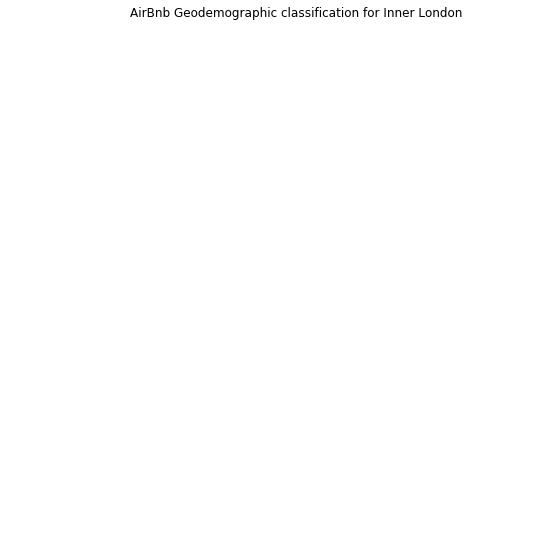

In [86]:
# Ajusta figura y ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Graficar valores únicos coropletas incluyendo una leyenda y sin líneas de límite
abb.plot(column='k5cls', categorical=True, legend=True, linewidth=0, ax=ax)
# Remueve ejes
ax.set_axis_off()
# Mentiene los ejes proporcionados
plt.axis('equal')
# Agrega título
plt.title('AirBnb Geodemographic classification for Inner London')
# Despliega el mapa
plt.show()

<p>El mapa de arriba representa la distribución geográfica de las cinco categorías creadas por el algoritmo K-means. Una mirada rápida muestra una estructura espacial fuerte en la distribución de los colores: el grupo tres (marrón) se encuentra principalmente en el centro de la ciudad y apenas en la periferia, mientras que el grupo dos (naranja) es el opuesto. El grupo cero (rojo) es intermedio, mientras que el grupo tres (marrón) y uno (verde) son mucho más pequeños y contienen solo un pequeño número de observaciones.</p>

<h2>Explorando la naturaleza de las categorías.</h2>
<p>Una vez que tenemos una idea de dónde y cómo se distribuyen las categorías en el espacio, también es útil explorarlas estadísticamente. Esto nos permitirá caracterizarlas, dándonos una idea del tipo de observaciones contenidas en cada uno de ellos. Como primer paso, veamos cuántas observaciones hay en cada categoría. Para hacer eso, haremos uso del operador groupby introducido anteriormente, combinado con el tamaño de la función, que devuelve el número de elementos en un subgrupo:</p>

In [87]:
k5sizes = abb.groupby('k5cls').size()
k5sizes

KeyError: 'k5cls'

<p>El operador groupby agrupa una tabla (DataFrame) usando los valores en la columna provista (k5cls) y los pasa a la función proporcionada de antemano, que en este caso es el tamaño. Efectivamente, lo que esto hace es agrupar por las observaciones por las categorías creadas y contar cuántas de ellas contiene cada una. Para una representación más visual de la salida, una gráfica de barras es una buena alternativa:</p>

In [88]:
_ = k5sizes.plot.bar()

NameError: name 'ksizes' is not defined

<p>Como sospechamos en el mapa, los grupos varían en tamaño, con los grupos cero, tres y cuatro más de 75 observaciones cada uno, y uno y dos menores de veinte.

Para describir la naturaleza de cada categoría, podemos observar los valores de cada uno de los atributos que hemos utilizado para crearlos en primer lugar. Recuerde que utilizamos las calificaciones promedio en muchos aspectos (limpieza, comunicación del anfitrión, etc.) para crear la clasificación, por lo que podemos comenzar por verificar el valor promedio de cada uno. Para hacer eso en Python, volveremos a usar el operador groupby pero, en este caso, lo combinaremos con la función media:</p>

In [89]:
k5means = abb.groupby('k5cls')[ratings].mean()
# Muestra la tabla transpuesta
k5means.T

KeyError: 'k5cls'

O podemos intentar obtener una descripción más completa e incluir también los cuartiles y la desviación estándar llamando a la función describe en lugar de simplemente la media:

In [90]:
# Calcular el summary 
k5desc = abb.groupby('k5cls')[ratings].describe()
# Muestra la tabla
k5desc

KeyError: 'k5cls'

<p>Sin embargo, este enfoque se expande rápidamente y las tablas se vuelven muy grandes para comunicar fácilmente cualquier patrón. Una buena alternativa es visualizar la distribución de valores por categoría. La siguiente extensión opcional muestra cómo transformar los datos para que pueda crear un gráfico bastante sofisticado que resuma la tabla anterior.</p>

<p>Para hacer esto convenientemente, necesitamos "ordenar" la tabla de valores. La tabla que queremos trazar para reemplazar el resumen anterior contiene los siguientes datos:</p>

In [91]:
# Nombrar (index) los renglones por la categoría a la que pertenecen 
to_plot = abb.set_index('k5cls')
# Subconjutno que solo mantiene las variables utilizadas por el K-Means
to_plot = to_plot[ratings]
# Muestra la tabla
to_plot.head()

KeyError: 'k5cls'


<p>Apilando los datos</p>

In [92]:
to_plot = to_plot.stack()
to_plot.head()

<p>Esto devuelve un objeto de indexación múltiple, que podemos convertirlo en un DataFrame al tratar el índice como columnas adicionales:</p>

In [93]:
to_plot = to_plot.reset_index()
to_plot.head()

Le damos a las columnas nombres más significativos:

In [94]:
to_plot = to_plot.rename(columns={'level_1': 'Rating', 0: 'Values'})
to_plot.head()

En este punto, estamos listos para visualizar la distribución de valores por tipo de calificación por categoría. Esto se hace en dos pasos:

In [95]:
# Setup the facets
facets = sns.FacetGrid(data=to_plot, row='Rating', hue='k5cls', \
                  sharey=False, sharex=False, aspect=2)
# Build the plot as a `sns.kdeplot`
_ = facets.map(sns.kdeplot, 'Values', shade=True).add_legend()

IndentationError: unexpected indent (<ipython-input-95-7c0c355e2845>, line 5)

Con esto concluye la sección de geodemografía. Como hemos visto, la esencia de este enfoque es agrupar áreas basándose únicamente en una base estadística: donde se ubica cada área es irrelevante para la etiqueta que recibe del algoritmo de agrupación. En muchos contextos, esto no solo es permisible sino incluso deseable, ya que el interés es ver si determinadas combinaciones de valores se distribuyen en el espacio de alguna manera discernible. Sin embargo, en otro contexto, es posible que nos interesen los grupos creados de observaciones que siguen ciertas restricciones espaciales. Para eso, ahora nos convertimos en técnicas de regionalización.

<h2> Ejercicio </h2>
Crea una nueva clasificación con 10 grupos. Compara los maps de salida de ambos ejercicios

<h2>Algoritmos de regionalización</h2>
<p>La regionalización es el subconjunto de técnicas de agrupamiento que imponen una restricción espacial en la clasificación. En otras palabras, el resultado de un algoritmo de regionalización contiene áreas que son espacialmente contiguas. Efectivamente, lo que esto significa es que estas técnicas agregan áreas en un conjunto más pequeño de las más grandes, llamadas regiones. En este contexto, entonces, las áreas están anidadas dentro de las regiones. Los ejemplos de este fenómeno en el mundo real incluyen los condados dentro de los estados o, en el Reino Unido, las áreas de superproducción local (LSOA) en áreas de superproducción media (MSOA). La diferencia entre esos ejemplos y la salida de un algoritmo de regionalización es que mientras que los primeros se agregan en base a principios administrativos, los últimos siguen una técnica estadística que, muy parecida a la agrupación estadística estándar, agrupa áreas que son similares en La base de un conjunto de atributos. Solo que ahora, tal agrupamiento estadístico está espacialmente restringido.

Para ilustrar estos conceptos, ejecutaremos un algoritmo de regionalización en los datos de AirBnb que hemos estado usando. En este caso, el objetivo será volver a delinear las líneas de límite de los condados de Inner London siguiendo una justificación basada en las diferentes calificaciones promedio de las propiedades de AirBnb, en lugar de las razones administrativas detrás de las líneas de límite existentes. De esta manera, las regiones resultantes representarán un conjunto consistente de áreas que son similares entre sí en términos de las calificaciones recibidas.

Definir formalmente el espacio De manera muy similar a la técnica ESDA, los métodos de regionalización requieren una representación formal del espacio que sea amigable con las estadísticas. En la práctica, esto significa que tendremos que crear una matriz de ponderaciones espaciales para las áreas que se agregarán.

Técnicamente hablando, este es el mismo proceso que hemos visto antes usando PySAL:


In [96]:
w = ps.weights.Queen.from_dataframe(abb)

AttributeError: module 'pysal' has no attribute 'eights'

<h3>Creación de regiones a partir de áreas</h3>
En este punto, tenemos todas las piezas necesarias para ejecutar un algoritmo de regionalización. Para este ejemplo, usaremos una versión espacialmente restringida del algoritmo de aglomeración. Este es un enfoque similar al utilizado anteriormente (sin embargo, el funcionamiento interno del algoritmo es diferente) con la diferencia de que, en este caso, las observaciones solo se pueden etiquetar en el mismo grupo si son vecinas espaciales, según lo define la variable de retardo espacio espacial. matriz de pesos w. La forma de interactuar con el algoritmo es muy similar a la anterior. Primero establecemos los parámetros:

In [97]:
sagg13 = cluster.AgglomerativeClustering(n_clusters=13, connectivity=w.sparse)
sagg13

NameError: name 'clustr' is not defined

Y podemos ejecutar el algoritmo llamando a la función fit:

In [98]:
# This line is required to obtain the same results always
np.random.seed(1234)
# Run the clustering algorithm
sagg13cls = sagg13.fit(abb[ratings])

NameError: name 'agg13' is not defined

And then we append the labels to the table:

In [99]:
abb['sagg13cls'] = sagg13cls.labels_

NameError: name 'sag13cls' is not defined

<h3>Mapeo de las regiones resultantes</h3>
En este punto, la columna sagg13cls no es diferente de k5cls: una variable categórica que se puede mapear en un único valor choropleth. De hecho, el siguiente fragmento de código es exactamente el mismo que antes, solo reemplazando el nombre de la variable que se asignará y el título:

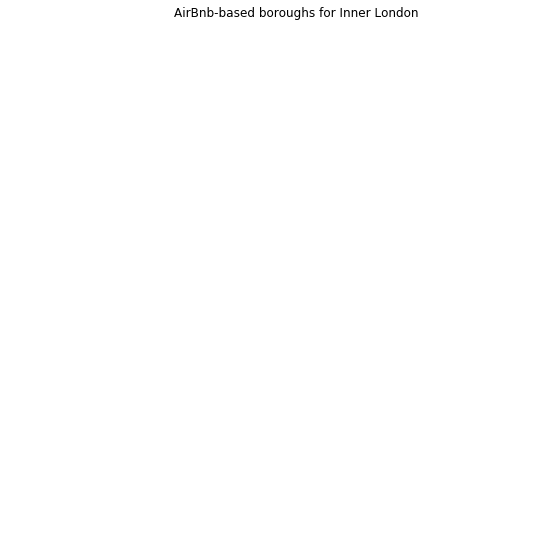

In [100]:
# Ajusta figura y ejes
f, ax = plt.subplots(1, figsize=(9, 9))
# Grafica por coro´pletas
abb.plot(column='sagg13cls', categorical=True, legend=True, linewidth=0, ax=ax)
# Remueve ejes
ax.set_axis_off()
# mantiene los ejes proporcionados
plt.axis('equal')
#AGrega título
plt.title('AirBnb-based boroughs for Inner London')
# Muestra el mapo
plt.show()

In [67]:
def dissolve(gs):
    '''
    Take a series of polygons and dissolve them into a single one
    
    Arguments
    ---------
    gs        : GeoSeries
                Sequence of polygons to be dissolved
    Returns
    -------
    dissolved : Polygon
                Single polygon containing all the polygons in `gs`
    '''
    return gs.unary_union

Los límites para los distritos de AirBnb se pueden obtener de la siguiente manera:

In [68]:
# Dissolve de los polígonos basados en `sagg13cls`
abb_boroughs = gpd.GeoSeries(abb.groupby(abb['sagg13cls'])\
                                .apply(dissolve),
                             crs=abb.crs)

In [101]:
# AJusta figura y ejes
f, ax = plt.subplots(1, figsize=(6, 6))
# Grafica las líneas de límites
abb_boroughs.plot(ax=ax, linewidth=0.5,\
                  facecolor='white', edgecolor='k')
# Remueve ejes
ax.set_axis_off()
# mantiene los ejes proporcionales
plt.axis('equal')
# Agrega título
plt.title('AirBnb-based boroughs for Inner London')
# Despliega el mapa
plt.show()

IndentationError: unexpected indent (<ipython-input-101-245197b979e6>, line 5)